In [2]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
path = "E:\\Img_datasets\\Chess_Pieces"

res = glob.glob(path+'\\*\\*.jpg')
print(len(res))
print(res)

651
['E:\\Img_datasets\\Chess_Pieces\\bishop\\00000000_resized.jpg', 'E:\\Img_datasets\\Chess_Pieces\\bishop\\00000002_resized.jpg', 'E:\\Img_datasets\\Chess_Pieces\\bishop\\00000003_resized.jpg', 'E:\\Img_datasets\\Chess_Pieces\\bishop\\00000004_resized.jpg', 'E:\\Img_datasets\\Chess_Pieces\\bishop\\00000005_resized.jpg', 'E:\\Img_datasets\\Chess_Pieces\\bishop\\00000006_resized.jpg', 'E:\\Img_datasets\\Chess_Pieces\\bishop\\00000008_resized.jpg', 'E:\\Img_datasets\\Chess_Pieces\\bishop\\00000009_resized.jpg', 'E:\\Img_datasets\\Chess_Pieces\\bishop\\00000010_resized.jpg', 'E:\\Img_datasets\\Chess_Pieces\\bishop\\00000013_resized.jpg', 'E:\\Img_datasets\\Chess_Pieces\\bishop\\00000014_resized.jpg', 'E:\\Img_datasets\\Chess_Pieces\\bishop\\00000015_resized.jpg', 'E:\\Img_datasets\\Chess_Pieces\\bishop\\00000016_resized.jpg', 'E:\\Img_datasets\\Chess_Pieces\\bishop\\00000017_resized.jpg', 'E:\\Img_datasets\\Chess_Pieces\\bishop\\00000018_resized.jpg', 'E:\\Img_datasets\\Chess_Pieces\\bi

In [7]:
img1 = "E:\\Img_datasets\\Chess_Pieces\\bishop\\00000000_resized.jpg"
r1 = os.path.split(img1)
print(r1)
r2 = r1[0]
print(r2)
r3 = os.path.split(r2)
print(r3)
print(r3[1])

('E:\\Img_datasets\\Chess_Pieces\\bishop', '00000000_resized.jpg')
E:\Img_datasets\Chess_Pieces\bishop
('E:\\Img_datasets\\Chess_Pieces', 'bishop')
bishop


In [10]:
labels = list(map(lambda x : os.path.split(os.path.split(x)[0])[1],res))
print(labels)

['bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop', 'bishop',

In [14]:
df = pd.DataFrame({'File_path':res,'Target':labels})
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,File_path,Target
0,E:\Img_datasets\Chess_Pieces\queen\00000058_re...,queen
1,E:\Img_datasets\Chess_Pieces\rook\00000077_res...,rook
2,E:\Img_datasets\Chess_Pieces\rook\00000098_res...,rook
3,E:\Img_datasets\Chess_Pieces\bishop\00000086_r...,bishop
4,E:\Img_datasets\Chess_Pieces\pawn\00000006_res...,pawn


In [16]:
df.shape

(651, 2)

In [15]:
df['File_path'][100]

'E:\\Img_datasets\\Chess_Pieces\\queen\\00000058_resized.jpg'

In [20]:
df.dtypes

File_path    object
Target       object
dtype: object

In [21]:
df['Target'].value_counts()

knight    174
bishop    141
rook      139
queen     115
pawn       82
Name: Target, dtype: int64

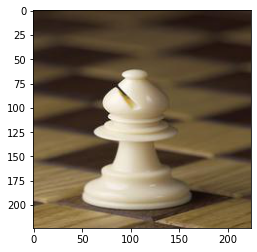

In [23]:
plt.imshow(plt.imread(df['File_path'][7]))

In [24]:
a = plt.imread(df.File_path[4])
a.shape

(224, 224, 3)

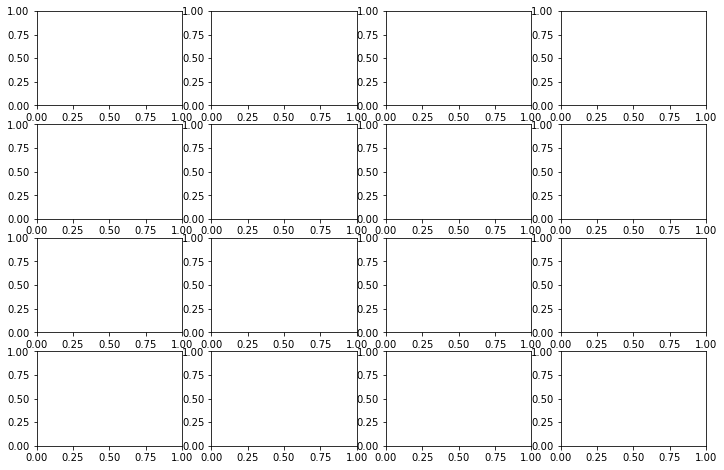

In [27]:
fig, axes = plt.subplots(4,4, figsize=(12, 8))
print(axes.flat)    

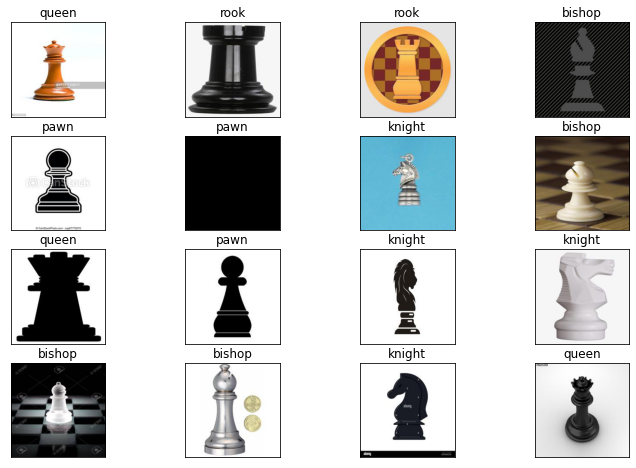

In [22]:
fig, axes = plt.subplots(4,4, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.File_path[i]))
    ax.set_title(df.Target[i])
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

In [25]:
from tensorflow.keras.preprocessing.image import img_to_array,load_img

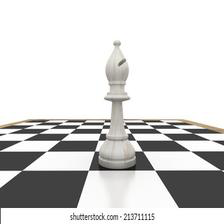

In [28]:
load_img(df['File_path'][88])

In [33]:
for i,j in df.iterrows():
    print('i',i)
    print('j',j['File_path'])
    if i>3:
        break

i 0
j E:\Img_datasets\Chess_Pieces\queen\00000058_resized.jpg
i 1
j E:\Img_datasets\Chess_Pieces\rook\00000077_resized.jpg
i 2
j E:\Img_datasets\Chess_Pieces\rook\00000098_resized.jpg
i 3
j E:\Img_datasets\Chess_Pieces\bishop\00000086_resized.jpg
i 4
j E:\Img_datasets\Chess_Pieces\pawn\00000006_resized.jpg


In [34]:
image_list =[]
labels =[]
for idx, row in df.iterrows():
    path = row['File_path']
    category = row['Target']
    imgs = img_to_array(load_img(path))   
    image_list.append(imgs)
    labels.append(category)

In [36]:
image_list[0].shape


(224, 224, 3)

In [37]:
w = [img_to_array(load_img(i)) for i in res]
print(w[0].shape)

(224, 224, 3)


In [42]:
shape_w = [w[i].shape for i in range(len(w))]
print(shape_w)

[(224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224, 3), (224, 224

In [35]:
from sklearn.preprocessing import LabelEncoder

In [38]:
lb = LabelEncoder()
y = lb.fit_transform(labels)
print(y[:10])

[3 4 4 0 2 2 1 0 3 2]


In [43]:
set(y)

{0, 1, 2, 3, 4}

In [54]:
x = np.array(image_list)
y = np.array(y) 
print(x.shape)
print(y.shape)

(651, 224, 224, 3)
(651,)


In [45]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 224, 224, 3)
(196, 224, 224, 3)
(455,)
(196,)


In [56]:
print(y_train[:10])

[2 1 1 0 4 1 1 4 2 2]


#### Building CNN Architecture

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, Flatten, MaxPooling2D, Dropout

#### Dropout(x)
<pre>
1) It is used to drop random x% of connections between the two layers between which it has been applied.
2) It acts as a means of preventing overfitting
</pre>

In [58]:
m1 = Sequential()
m1.add(Conv2D(64,(3,3),activation='relu',input_shape=(224,224,3)))
m1.add(MaxPooling2D(pool_size=(2,2)))
m1.add(Dropout(0.2))

m1.add(Conv2D(64,(3,3),activation='relu')) # stride=1
m1.add(MaxPooling2D(pool_size=(2,2))) # stride=2
       
m1.add(Flatten())
m1.add(Dense(32,activation='relu'))
m1.add(Dense(16,activation='relu'))
m1.add(Dense(5,activation='softmax'))
       
m1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [59]:
h1 = m1.fit(x_train,y_train,epochs=12,validation_data=(x_test,y_test))

Epoch 1/12
15/15 [==============================] - 83s 5s/step - loss: 1726.8264 - accuracy: 0.2132 - val_loss: 1.6107 - val_accuracy: 0.2602
Epoch 2/12
15/15 [==============================] - 74s 5s/step - loss: 1.5785 - accuracy: 0.2659 - val_loss: 1.6066 - val_accuracy: 0.2857
Epoch 3/12
15/15 [==============================] - 84s 6s/step - loss: 1.5710 - accuracy: 0.2901 - val_loss: 1.6030 - val_accuracy: 0.2398
Epoch 4/12
15/15 [==============================] - 92s 6s/step - loss: 1.5110 - accuracy: 0.3165 - val_loss: 1.5989 - val_accuracy: 0.2857
Epoch 5/12
15/15 [==============================] - 86s 6s/step - loss: 1.4452 - accuracy: 0.3626 - val_loss: 1.7628 - val_accuracy: 0.2857
Epoch 6/12
15/15 [==============================] - 82s 5s/step - loss: 1.2572 - accuracy: 0.4242 - val_loss: 1.7180 - val_accuracy: 0.2500
Epoch 7/12
15/15 [==============================] - 79s 5s/step - loss: 1.1467 - accuracy: 0.4945 - val_loss: 1.9714 - val_accuracy: 0.2653
Epoch 8/12
15/15 

In [61]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
7,1.064095,0.551648,1.830558,0.280612,7
8,0.989370,0.575824,1.860244,0.280612,8
9,0.936982,0.615385,2.437054,0.306122,9
10,0.803125,0.659341,2.030660,0.336735,10
11,0.863446,0.694506,2.628980,0.326531,11


In [1]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
fig,axes=plt.subplots(5,5,figsize=(8,8))
fig.set_facecolor('orange')
axs[0,1].plot()